In [54]:
#pip install tfv

In [55]:
from pathlib import Path # We'll also make use of the `pathlib` module to assist with managing file-paths, although this is entirely optional! 
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import seaborn as sns
import tfv.xarray
import xarray as xr  # We utilise xarray to do all the heavy lifting 
from tfv.extractor import FvExtractor
from tfv.timeseries import FvTimeSeries
from shapely import wkt
# A nice plot default
sns.set(style='white', font_scale=0.8)

In [ ]:
model_folder = Path(r'/Projects2/csiem/model/csiem_model_tfvaed_1.6/outputs/results')

#model_file =  'csiem_B009_20221101_20240401_WQ.nc'  # 2023B
#model_file =  'csiem_B009_20211101_20221231_WQ.nc'  # 2022B
#model_file =  'csiem_A001_20201101_20211231_WQ.nc'  # 2021A
model_file =  'csiem_A001_20181101_20191231_WQ.nc'  # 2019A

ds=xr.open_dataset(model_folder / model_file)
fv=ds.tfv
fv

<xarray.Dataset> Size: 90GB
Dimensions:      (Time: 6181, NumLayerFaces3D: 534016, NumCells2D: 30206,
                  NumCells3D: 503810)
Coordinates:
  * Time         (Time) datetime64[ns] 49kB 2022-11-02 ... 2024-03-31
Dimensions without coordinates: NumLayerFaces3D, NumCells2D, NumCells3D
Data variables:
    ResTime      (Time) datetime64[ns] 49kB 2022-11-02 ... 2024-03-31
    layerface_Z  (Time, NumLayerFaces3D) float32 13GB ...
    stat         (Time, NumCells2D) int32 747MB ...
    H            (Time, NumCells2D) float32 747MB ...
    D            (Time, NumCells2D) float32 747MB ...
    V_x          (Time, NumCells3D) float32 12GB ...
    V_y          (Time, NumCells3D) float32 12GB ...
    W            (Time, NumCells3D) float32 12GB ...
    SAL          (Time, NumCells3D) float32 12GB ...
    TEMP         (Time, NumCells3D) float32 12GB ...
    TRACE_1      (Time, NumCells3D) float32 12GB ...
Attributes:
    Origin:     Created by TUFLOWFV
    Type:       Cell-centred TUFLOWFV output
    spherical:  true
    Dry depth:  0.01

TUFLOW FV domain xarray accessor object

In [57]:
print(ds.attrs)

{'Origin': 'Created by TUFLOWFV', 'Type': 'Cell-centred TUFLOWFV output', 'spherical': 'true', 'Dry depth': np.float32(0.01)}


In [58]:
from shapely import wkt

# WKT strings for the geometries
circle = "POLYGON ((115.45348809360418 -32.08363563354125, 115.45338880003933 -32.08462060486946, \
115.45310402147841 -32.08553801040421, 115.45265341112184 -32.08636819694506, \
115.45205662217009 -32.08709151129159, 115.45133330782357 -32.08768830024334, \
115.45050312128271 -32.08813891059991, 115.44958571574796 -32.08842368916083, \
115.44860074441975 -32.08852298272568, 115.44761577309154 -32.08842368916083, \
115.44669836755679 -32.08813891059991, 115.44586818101592 -32.08768830024334, \
115.44514486666941 -32.08709151129159, 115.44454807771766 -32.08636819694506, \
115.44409746736109 -32.08553801040421, 115.44381268880016 -32.08462060486946, \
115.44371339523532 -32.08363563354125, 115.44381268880016 -32.08265066221304, \
115.44409746736109 -32.08173325667829, 115.44454807771766 -32.08090307013744, \
115.44514486666941 -32.08017975579091, 115.44586818101592 -32.079582966839155, \
115.44669836755679 -32.07913235648259, 115.44761577309154 -32.07884757792167, \
115.44860074441975 -32.07874828435682, 115.44958571574796 -32.07884757792167, \
115.45050312128271 -32.07913235648259, 115.45133330782357 -32.079582966839155, \
115.45205662217009 -32.08017975579091, 115.45265341112184 -32.08090307013744, \
115.45310402147841 -32.08173325667829, 115.45338880003933 -32.08265066221304, \
115.45348809360418 -32.08363563354125))"

triangle = "LINESTRING (115.71141815185547 -32.17995587069068, 115.70774841308594 -32.189340025964114, \
115.71672821044922 -32.18648663240943, 115.71101379394531 -32.18077221590552, \
115.71101379394531 -32.18077221590552, 115.71101379394531 -32.18077221590552)"

# Parse WKT and get centroids
circle_geom = wkt.loads(circle)
triangle_geom = wkt.loads(triangle)

circle_centroid = circle_geom.centroid
triangle_centroid = triangle_geom.centroid  # For linestring, centroid is the center point

# Sites as strings for FvTimeSeries
circle_site = f"{circle_centroid.x} {circle_centroid.y}"
triangle_site = f"{triangle_centroid.x} {triangle_centroid.y}"

In [59]:
circle_site=(115.46, -32.08)  # Approximate centroid of the circle polygon
triangle_site=(115.71, -32.1799)  # Approximate centroid of the triangle polygon

In [60]:
locs={'circle': circle_site, 'triangle': triangle_site}

In [61]:
# ts=fv.get_timeseries(["TEMP", "SAL"], locs, time=slice("2023-01-01", "2023-12-31"), datum='depth', limits=(0, 10), agg='mean')
ts = fv.get_timeseries(["TEMP", "SAL"], locs, datum='depth', limits=(9.95, 10.05), agg='mean')


Extracting timeseries, please wait:   0%|          | 0/6181 [00:00<?, ?it/s]

Extracting timeseries, please wait: 100%|██████████| 6181/6181 [20:14<00:00,  5.09it/s]


In [62]:
ts

<xarray.Dataset> Size: 247kB
Dimensions:   (Time: 6181, Location: 2)
Coordinates:
  * Time      (Time) datetime64[ns] 49kB 2022-11-02 ... 2024-03-31
  * Location  (Location) <U8 64B 'circle' 'triangle'
    x         (Location) float64 16B 115.5 115.7
    y         (Location) float64 16B -32.08 -32.18
    z         (Location) float32 8B -38.52 -21.21
Data variables:
    TEMP      (Time, Location) float64 99kB 19.69 19.51 19.67 ... 21.83 22.44
    SAL       (Time, Location) float64 99kB 35.63 35.52 35.63 ... 36.3 37.6
Attributes:
    Origin:     Timeseries extracted from TUFLOWFV cell-centered output using...
    Type:       Timeseries cell from TUFLOWFV Output
    spherical:  true
    Dry depth:  0.01
    Datum:      depth
    Limits:     (9.95, 10.05)
    Agg Fn:     mean

In [63]:
# desample it to monthly
monthly_ts=ts.resample(Time='1ME').mean()
monthly_ts


<xarray.Dataset> Size: 784B
Dimensions:   (Time: 17, Location: 2)
Coordinates:
  * Location  (Location) <U8 64B 'circle' 'triangle'
    x         (Location) float64 16B 115.5 115.7
    y         (Location) float64 16B -32.08 -32.18
    z         (Location) float32 8B -38.52 -21.21
  * Time      (Time) datetime64[ns] 136B 2022-11-30 2022-12-31 ... 2024-03-31
Data variables:
    TEMP      (Time, Location) float64 272B 19.4 19.68 20.54 ... 22.17 22.99
    SAL       (Time, Location) float64 272B 35.58 35.7 35.64 ... 36.38 37.7
Attributes:
    Origin:     Timeseries extracted from TUFLOWFV cell-centered output using...
    Type:       Timeseries cell from TUFLOWFV Output
    spherical:  true
    Dry depth:  0.01
    Datum:      depth
    Limits:     (9.95, 10.05)
    Agg Fn:     mean

In [64]:
ts_df = monthly_ts.to_dataframe()
ts_df

TEMP        SAL       x        y          z
Time       Location                                                  
2022-11-30 circle    19.403885  35.582251  115.46 -32.0800 -38.518841
           triangle  19.678143  35.701316  115.71 -32.1799 -21.209785
2022-12-31 circle    20.544722  35.642835  115.46 -32.0800 -38.518841
           triangle  21.552158  36.054265  115.71 -32.1799 -21.209785
2023-01-31 circle    21.138519  36.121923  115.46 -32.0800 -38.518841
           triangle  22.264345  36.490132  115.71 -32.1799 -21.209785
2023-02-28 circle    22.031874  36.364888  115.46 -32.0800 -38.518841
           triangle  23.196045  37.036192  115.71 -32.1799 -21.209785
2023-03-31 circle    22.743775  36.121468  115.46 -32.0800 -38.518841
           triangle  22.864151  37.318540  115.71 -32.1799 -21.209785
2023-04-30 circle    21.961044  35.985208  115.46 -32.0800 -38.518841
           triangle  20.972860  36.983564  115.71 -32.1799 -21.209785
2023-05-31 circle    21.577615  35.658745  115.46 -32.0800 -38.518841
           triangle  18.856524  36.282072  115.71 -32.1799 -21.209785
2023-06-30 circle    20.019712  35.539152  115.46 -32.0800 -38.518841
           triangle  17.174222  35.712284  115.71 -32.1799 -21.209785
2023-07-31 circle    19.160197  35.569897  115.46 -32.0800 -38.518841
           triangle  16.215560  35.562419  115.71 -32.1799 -21.209785
2023-08-31 circle    18.962861  35.491475  115.46 -32.0800 -38.518841
           triangle  16.809357  35.554528  115.71 -32.1799 -21.209785
2023-09-30 circle    19.325182  35.423307  115.46 -32.0800 -38.518841
           triangle  18.366492  35.410177  115.71 -32.1799 -21.209785
2023-10-31 circle    19.446227  35.448459  115.46 -32.0800 -38.518841
           triangle  19.735473  35.602673  115.71 -32.1799 -21.209785
2023-11-30 circle    20.116892  35.738536  115.46 -32.0800 -38.518841
           triangle  20.902575  35.826731  115.71 -32.1799 -21.209785
2023-12-31 circle    21.478488  36.018144  115.46 -32.0800 -38.518841
           triangle  22.598659  36.430157  115.71 -32.1799 -21.209785
2024-01-31 circle    22.462677  36.278067  115.46 -32.0800 -38.518841
           triangle  23.737132  36.919554  115.71 -32.1799 -21.209785
2024-02-29 circle    22.231323  36.528268  115.46 -32.0800 -38.518841
           triangle  23.662616  37.428444  115.71 -32.1799 -21.209785
2024-03-31 circle    22.171599  36.379358  115.46 -32.0800 -38.518841
           triangle  22.987043  37.699131  115.71 -32.1799 -21.209785

In [65]:
import pandas as pd

# Assuming your dataframe is called df
# (with MultiIndex: Time, Location)

# Pivot so that circle/triangle become columns
df_wide = ts_df.reset_index().pivot(index="Time", columns="Location", values=["TEMP", "SAL"])

# Compute deltas from triangle to circle
df_wide["delta_TEMP"] = df_wide["TEMP"]["triangle"] - df_wide["TEMP"]["circle"]
df_wide["delta_SAL"] = df_wide["SAL"]["triangle"] - df_wide["SAL"]["circle"]

# Flatten the columns
df_wide.columns = ["_".join(col).strip() if isinstance(col, tuple) else col for col in df_wide.columns]

print(df_wide.head())


            TEMP_circle  TEMP_triangle  SAL_circle  SAL_triangle  delta_TEMP_  \
Time                                                                            
2022-11-30    19.403885      19.678143   35.582251     35.701316     0.274257   
2022-12-31    20.544722      21.552158   35.642835     36.054265     1.007436   
2023-01-31    21.138519      22.264345   36.121923     36.490132     1.125826   
2023-02-28    22.031874      23.196045   36.364888     37.036192     1.164170   
2023-03-31    22.743775      22.864151   36.121468     37.318540     0.120375   

            delta_SAL_  
Time                    
2022-11-30    0.119065  
2022-12-31    0.411430  
2023-01-31    0.368209  
2023-02-28    0.671304  
2023-03-31    1.197071  


In [66]:
# column names
df_wide.columns

Index(['TEMP_circle', 'TEMP_triangle', 'SAL_circle', 'SAL_triangle',
       'delta_TEMP_', 'delta_SAL_'],
      dtype='object')

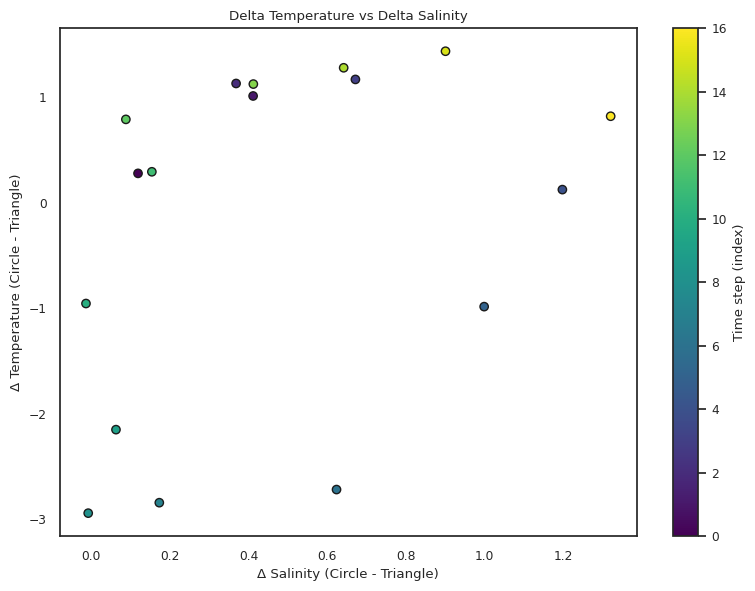

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot with circle markers
sc = ax.scatter(
    df_wide["delta_SAL_"],
    df_wide["delta_TEMP_"],
    marker="o",       # circular markers
    c=range(len(df_wide)),  # color by time index
    cmap="viridis",
    edgecolor="k"
)

# Labels and title
ax.set_xlabel("Δ Salinity (Circle - Triangle)")
ax.set_ylabel("Δ Temperature (Circle - Triangle)")
ax.set_title("Delta Temperature vs Delta Salinity")

# Colorbar to show time progression
cbar = plt.colorbar(sc, ax=ax, label="Time step (index)")

plt.tight_layout()
plt.show()



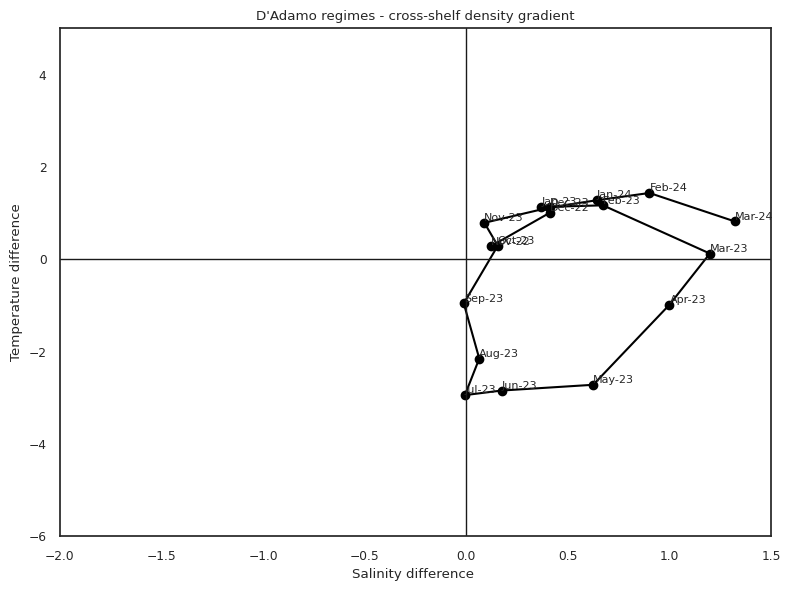

In [68]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

# Plot trajectory
ax.plot(df_wide["delta_SAL_"], df_wide["delta_TEMP_"], '-o', color="black")

# Add labels (month-year) at each point
for i, (x, y) in enumerate(zip(df_wide["delta_SAL_"], df_wide["delta_TEMP_"])):
    label = df_wide.index.strftime("%b-%y")[i]  # format like "Jan-23"
    ax.text(x, y, label, fontsize=8, ha="left", va="bottom")

# Labels
ax.set_xlabel("Salinity difference ")
ax.set_ylabel("Temperature difference")
ax.set_title("D'Adamo regimes - cross-shelf density gradient")

# Axes lines (to highlight quadrants like in your example)
ax.axhline(0, color="k", lw=1)
ax.axvline(0, color="k", lw=1)
ax.set_xlim(-2, 1.5)
ax.set_ylim(-6, 5)
plt.tight_layout()
plt.show()


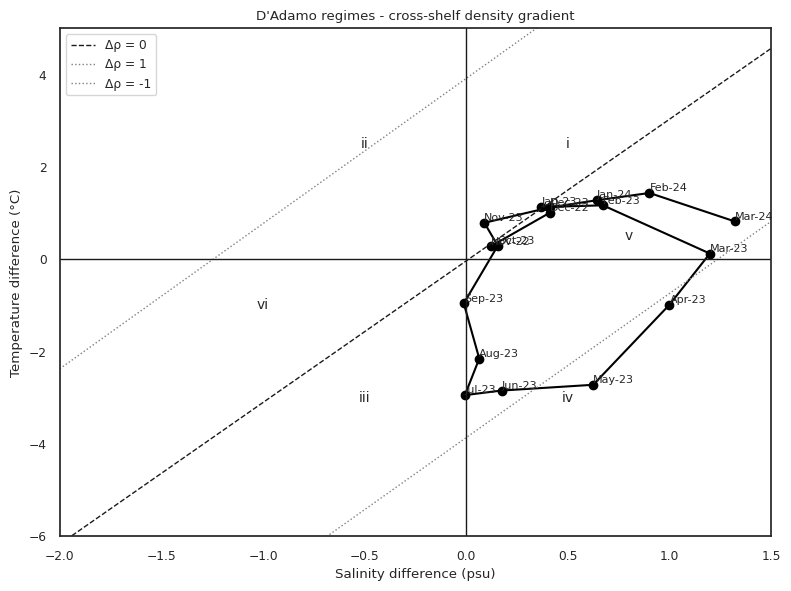

In [69]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6))

# Plot trajectory
ax.plot(df_wide["delta_SAL_"], df_wide["delta_TEMP_"], '-o', color="black")

# Add labels (month-year) at each point
for i, (x, y) in enumerate(zip(df_wide["delta_SAL_"], df_wide["delta_TEMP_"])):
    label = df_wide.index.strftime("%b-%y")[i]  # format like "Jan-23"
    ax.text(x, y, label, fontsize=8, ha="left", va="bottom")

# Define points for diagonal lines (based on provided data)
# delRHO = 0
x0 = np.array([-1.92780, 1.38592])
y0 = np.array([-5.94957, 4.21658])
# delRHO = 1
x1 = np.array([-1.99102, 0.46217])
y1 = np.array([-2.34638, 5.36822])
# delRHO = -1
x2 = np.array([-0.66557, 1.38849])
y2 = np.array([-5.93849, 0.47374])

# Calculate slopes and intercepts for each line
def line_equation(x, x_points, y_points):
    m = (y_points[1] - y_points[0]) / (x_points[1] - x_points[0])
    b = y_points[0] - m * x_points[0]
    return m * x + b

x_ext = np.linspace(-2, 1.5, 100)
# delRHO = 0 as black dashed line
m0 = (y0[1] - y0[0]) / (x0[1] - x0[0])
b0 = y0[0] - m0 * x0[0]
ax.plot(x_ext, m0 * x_ext + b0, 'k--', lw=1, label="Δρ = 0")
# delRHO = 1 as grey dotted line
m1 = (y1[1] - y1[0]) / (x1[1] - x1[0])
b1 = y1[0] - m1 * x1[0]
ax.plot(x_ext, m1 * x_ext + b1, color='grey', ls=':', lw=1, label="Δρ = 1")
# delRHO = -1 as grey dotted line
m2 = (y2[1] - y2[0]) / (x2[1] - x2[0])
b2 = y2[0] - m2 * x2[0]
ax.plot(x_ext, m2 * x_ext + b2, color='grey', ls=':', lw=1, label="Δρ = -1")

# Add regime labels (i to vi) based on original figure quadrants
ax.text(0.5, 2.5, "i", ha="center", va="center", fontsize=10)
ax.text(-0.5, 2.5, "ii", ha="center", va="center", fontsize=10)
ax.text(-0.5, -3, "iii", ha="center", va="center", fontsize=10)
ax.text(0.5, -3, "iv", ha="center", va="center", fontsize=10)
ax.text(0.8, 0.5, "v", ha="center", va="center", fontsize=10)
ax.text(-1.0, -1.0, "vi", ha="center", va="center", fontsize=10)

# Labels
ax.set_xlabel("Salinity difference (psu)")
ax.set_ylabel("Temperature difference (°C)")
ax.set_title("D'Adamo regimes - cross-shelf density gradient")

# Axes lines (to highlight quadrants)
ax.axhline(0, color="k", lw=1)
ax.axvline(0, color="k", lw=1)

# Adjust limits
ax.set_xlim(-2, 1.5)
ax.set_ylim(-6, 5)

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

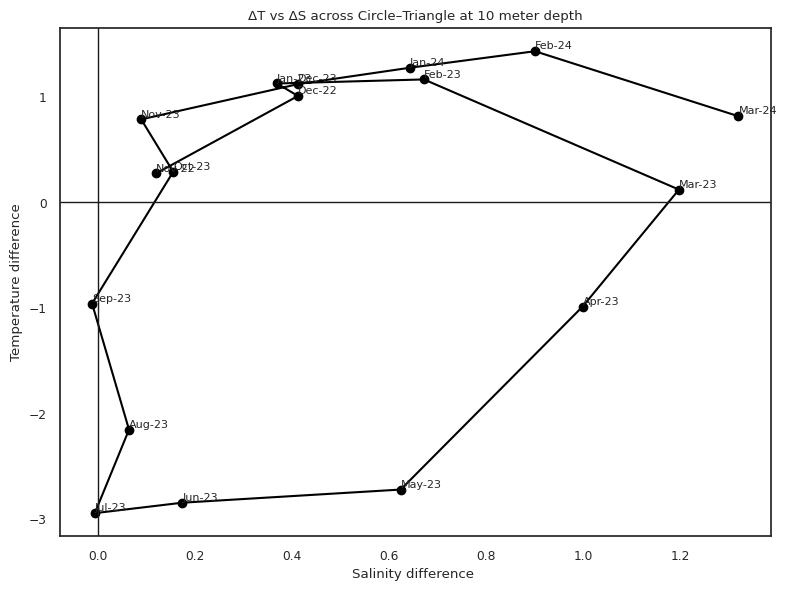

In [70]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

# Plot trajectory
ax.plot(df_wide["delta_SAL_"], df_wide["delta_TEMP_"], '-o', color="black")

# Add labels (month-year) at each point
for i, (x, y) in enumerate(zip(df_wide["delta_SAL_"], df_wide["delta_TEMP_"])):
    label = df_wide.index.strftime("%b-%y")[i]  # format like "Jan-23"
    ax.text(x, y, label, fontsize=8, ha="left", va="bottom")

# Labels
ax.set_xlabel("Salinity difference ")
ax.set_ylabel("Temperature difference")
ax.set_title("ΔT vs ΔS across Circle–Triangle at 10 meter depth")

# Axes lines (to highlight quadrants like in your example)
ax.axhline(0, color="k", lw=1)
ax.axvline(0, color="k", lw=1)

plt.tight_layout()
plt.show()


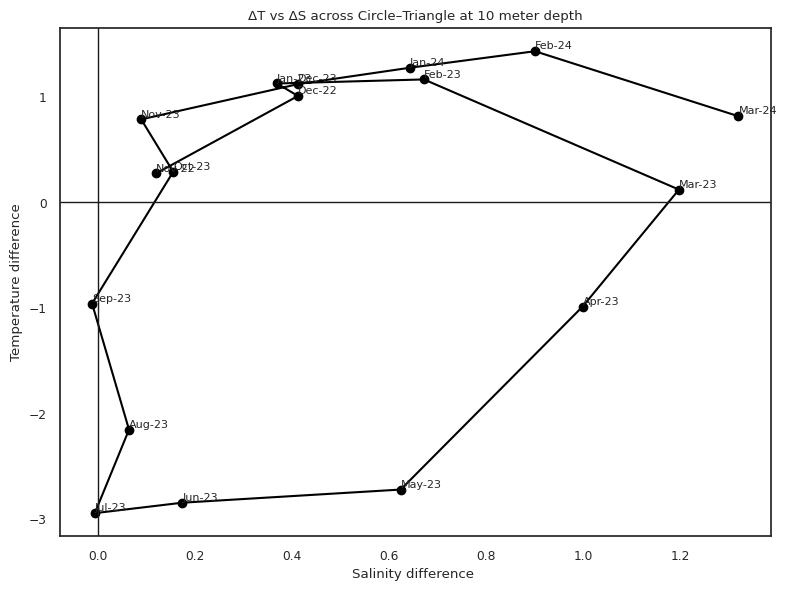

In [71]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

# Plot trajectory
ax.plot(df_wide["delta_SAL_"], df_wide["delta_TEMP_"], '-o', color="black")

# Add labels (month-year) at each point
for i, (x, y) in enumerate(zip(df_wide["delta_SAL_"], df_wide["delta_TEMP_"])):
    label = df_wide.index.strftime("%b-%y")[i]  # format like "Jan-23"
    ax.text(x, y, label, fontsize=8, ha="left", va="bottom")

# Labels
ax.set_xlabel("Salinity difference ")
ax.set_ylabel("Temperature difference")
ax.set_title("ΔT vs ΔS across Circle–Triangle at 10 meter depth")

# Axes lines (to highlight quadrants like in your example)
ax.axhline(0, color="k", lw=1)
ax.axvline(0, color="k", lw=1)

plt.tight_layout()
plt.show()

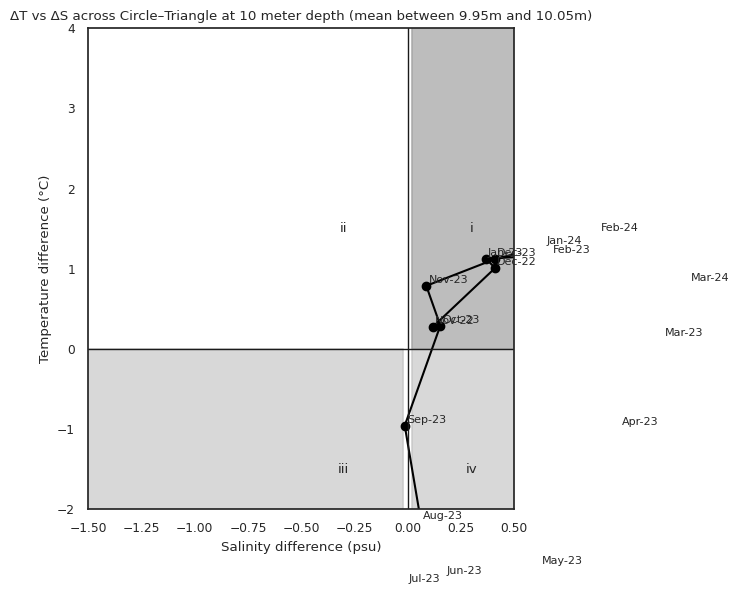

In [72]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6))

# Plot trajectory
ax.plot(df_wide["delta_SAL_"], df_wide["delta_TEMP_"], '-o', color="black")

# Add labels (month-year) at each point
for i, (x, y) in enumerate(zip(df_wide["delta_SAL_"], df_wide["delta_TEMP_"])):
    label = df_wide.index.strftime("%b-%y")[i]  # format like "Jan-23"
    ax.text(x+0.01, y+0.01, label, fontsize=8, ha="left", va="bottom")

# Labels
ax.set_xlabel("Salinity difference (psu)")
ax.set_ylabel("Temperature difference (°C)")
ax.set_title("ΔT vs ΔS across Circle–Triangle at 10 meter depth (mean between 9.95m and 10.05m)")

# Axes lines (to highlight quadrants)
ax.axhline(0, color="k", lw=1)
ax.axvline(0, color="k", lw=1)

alpha, beta = 0.2, 0.8
x = np.linspace(-2, 2, 100)

# Shaded regions (quadrants with annotations)
# Upper-right (Differential heating dominates)
ax.fill_between(x, 0, (beta * x + 1) / alpha, where=x > 0, color='gray', alpha=0.3)

# Upper-left (Evaporation dominates)
ax.fill_between(x, 0, (beta * x - 1) / alpha, where=x < 0, color='gray', alpha=0.3)

# Lower-left (Differential cooling and Leeuwin Current)
ax.fill_between(x, -6, (beta * x - 1) / alpha, where=x < 0, color='gray', alpha=0.3)

# Lower-right (River discharge dominates)
ax.fill_between(x, -6, (beta * x + 1) / alpha, where=x > 0, color='gray', alpha=0.3)

# Add regime labels (i to vi) - adjust positions based on your data
ax.text(0.3, 1.5, "i", ha="center", va="center")
ax.text(-0.3, 1.5, "ii", ha="center", va="center")
ax.text(-0.3, -1.5, "iii", ha="center", va="center")
ax.text(0.3, -1.5, "iv", ha="center", va="center")
# Add v and vi as needed based on your data distribution

# Adjust limits to match the original plot
ax.set_xlim(-1.5, 0.5)
ax.set_ylim(-2, 4)

plt.tight_layout()
plt.show()

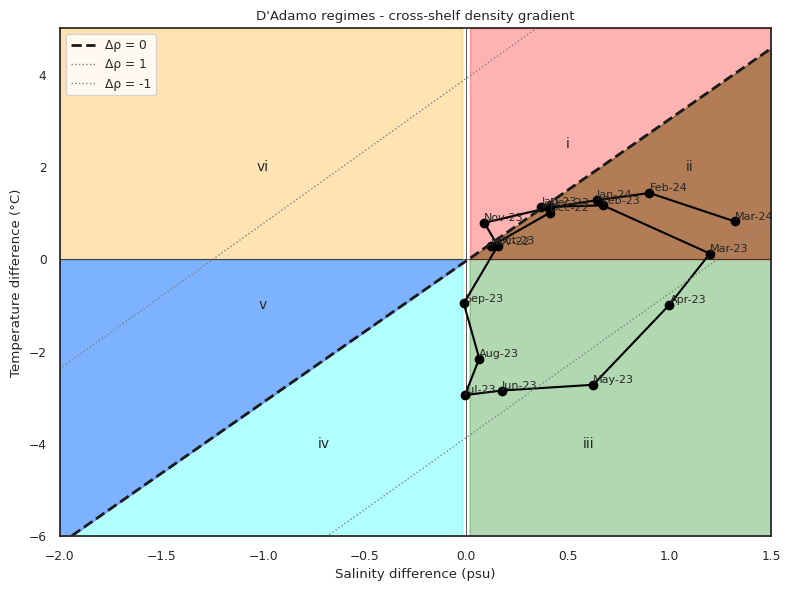

In [73]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6))

# Plot trajectory
ax.plot(df_wide["delta_SAL_"], df_wide["delta_TEMP_"], '-o', color="black")

# Add labels (month-year) at each point
for i, (x, y) in enumerate(zip(df_wide["delta_SAL_"], df_wide["delta_TEMP_"])):
    label = df_wide.index.strftime("%b-%y")[i]  # format like "Jan-23"
    ax.text(x, y, label, fontsize=8, ha="left", va="bottom")

# Define points for diagonal lines (using original provided data)
# delRHO = 0
x0 = np.array([-1.92780, 1.38592])
y0 = np.array([-5.94957, 4.21658])
# delRHO = 1
x1 = np.array([-1.99102, 0.46217])
y1 = np.array([-2.34638, 5.36822])
# delRHO = -1
x2 = np.array([-0.66557, 1.38849])
y2 = np.array([-5.93849, 0.47374])

# Calculate slopes and intercepts for each line
def line_equation(x, x_points, y_points):
    m = (y_points[1] - y_points[0]) / (x_points[1] - x_points[0])
    b = y_points[0] - m * x_points[0]
    return m * x + b

x_ext = np.linspace(-2, 1.5, 100)
# delRHO = 0 as black dashed line
m0 = (y0[1] - y0[0]) / (x0[1] - x0[0])
b0 = y0[0] - m0 * x0[0]
ax.plot(x_ext, m0 * x_ext + b0, 'k--', lw=2, label="Δρ = 0")
# delRHO = 1 as grey dotted line
m1 = (y1[1] - y1[0]) / (x1[1] - x1[0])
b1 = y1[0] - m1 * x1[0]
ax.plot(x_ext, m1 * x_ext + b1, color='grey', ls=':', lw=1, label="Δρ = 1")
# delRHO = -1 as grey dotted line
m2 = (y2[1] - y2[0]) / (x2[1] - x2[0])
b2 = y2[0] - m2 * x2[0]
ax.plot(x_ext, m2 * x_ext + b2, color='grey', ls=':', lw=1, label="Δρ = -1")

# Shade regions with transparent colors (exact pattern as described)
x = np.linspace(-2, 1.5, 100)
# i (upper-right above y=0, pink) - right of x=0, above y=0, up to delRHO=0
ax.fill_between(x, 0, 5, where=(x > 0), color='red', alpha=0.3)
# ii (upper-right below y=0, red) - right of x=0, below y=0, up to delRHO=0
ax.fill_between(x, m0 * x + b0, 0, where=(x > 0), color='red', alpha=0.3)
# iii (lower-left below delRHO=0, green) - left of x=0, below delRHO=0
ax.fill_between(x, -6, where=(x < 0), color='cyan', alpha=0.3)
# iv (lower-right, light blue) - right of x=0, below delRHO=0
ax.fill_between(x, -6, m0 * x + b0, where=(x >= 0), color='green', alpha=0.3)
# v (lower-left above delRHO=0, blue) - left of x=0, above delRHO=0, below y=0
ax.fill_between(x, m0 * x + b0, 0, where=(x < 0), color='blue', alpha=0.3)
# vi (upper-left, yellow) - left of x=0, above y=0, above delRHO=0
ax.fill_between(x, 0, 5, where=(x < 0), color='orange', alpha=0.3)

# Add regime labels (matching described positions)
ax.text(0.5, 2.5, "i", ha="center", va="center", fontsize=10)
ax.text(1.1, 2, "ii", ha="center", va="center", fontsize=10)
ax.text(-0.7, -4, "iv", ha="center", va="center", fontsize=10)
ax.text(0.6, -4.0, "iii", ha="center", va="center", fontsize=10)
ax.text(-1.0, -1.0, "v", ha="center", va="center", fontsize=10)
ax.text(-1.0, 2.0, "vi", ha="center", va="center", fontsize=10)

# Labels
ax.set_xlabel("Salinity difference (psu)")
ax.set_ylabel("Temperature difference (°C)")
ax.set_title("D'Adamo regimes - cross-shelf density gradient")

# Axes lines (to highlight quadrants)
ax.axhline(0, color="k", lw=0.5)
ax.axvline(0, color="k", lw=0.5)

# Adjust limits
ax.set_xlim(-2, 1.5)
ax.set_ylim(-6, 5)

# Add legend
ax.legend()

plt.tight_layout()
plt.show()